<a href="https://colab.research.google.com/github/ocelotzin/Tarea2_AnNumerico/blob/main/ejercicio_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Tarea 1 Analisis Numerico</i></h1>
  </font>
  <font color="Blue" face="Comic Sans MS,arial">
  <h5 align="center"><i>MARTINEZ ROSAS ZAYDE YAMILE</i></h5>
  <h5 align="center"><i>CAMACHO MARIN ANA KAREN</i></h5>
  <h5 align="center"><i>LÓPEZ AGUIRRE ROBERTO OCELOTZIN</i></h5>
  <h5 align="center"><i>VARGAS BAUTISTA EMMANUEL</i></h5>
  </font>

Parámetros orbitales:
a = -2.63563
b = 0.14365
c = 0.55145
d = 3.22294
e = -0.43289


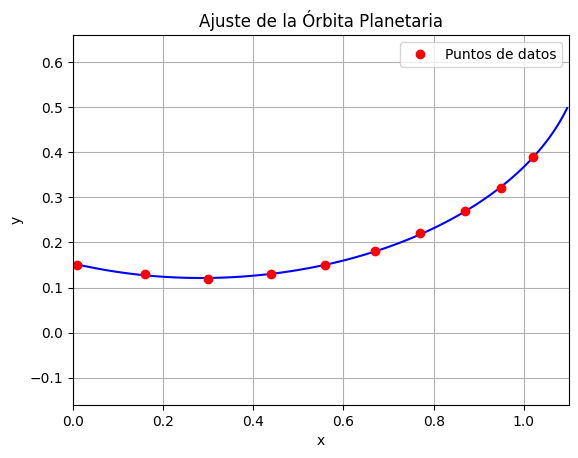

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos de datos
x_valores = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
y_valores = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])

# Autoamtizamos la contonstruccion dd la matriz X y el vector z
X = np.column_stack([
    y_valores**2,
    x_valores * y_valores,
    x_valores,
    y_valores,
    np.ones_like(x_valores)
])
z = x_valores**2

# Resolvemos por minimos cuadrados tal cual como en el problema anterior: X^T X beta = X^T z
X_transpuesta = X.T
XtX = X_transpuesta @ X
Xtz = X_transpuesta @ z

# Usamos la eliminación de Gauss para resolver XtX * beta = Xtz
#Este codigo se saco de la tarea anterior con algunos cambios para no necesitar tantas lineas
def gauss_eliminacion(A, b):
    A = A.astype(float)
    b = b.astype(float)
    n = len(b)

    # Eliminación hacia adelante
    for i in range(n):
        # Pivoteo parcial (opcional)
        max_fila = np.argmax(abs(A[i:, i])) + i
        if max_fila != i:
            A[[i, max_fila]] = A[[max_fila, i]]
            b[[i, max_fila]] = b[[max_fila, i]]

        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

parametros = gauss_eliminacion(XtX.copy(), Xtz.copy())
a, b, c, d, e = parametros

# Enseñamos los resultados obtenidos
print("Parámetros orbitales:")
print(f"a = {a:.5f}")
print(f"b = {b:.5f}")
print(f"c = {c:.5f}")
print(f"d = {d:.5f}")
print(f"e = {e:.5f}")

# Graficamos con los datos la curva que ajustamos
rejilla_x = np.linspace(0, 1.1, 400)
rejilla_y = np.linspace(0, 0.5, 400)
Xg, Yg = np.meshgrid(rejilla_x, rejilla_y)

# Evaluamos la funcion de la elipse dada
F = a * Yg**2 + b * Xg * Yg + c * Xg + d * Yg + e - Xg**2

# Graficamos la línea de nivel donde F = 0
plt.contour(Xg, Yg, F, levels=[0], colors='blue')
plt.plot(x_valores, y_valores, 'ro', label='Puntos de datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de la Órbita Planetaria')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


#Comprobacion con NUMPY :)

Parámetros orbitales:
a = -2.63563
b = 0.14365
c = 0.55145
d = 3.22294
e = -0.43289


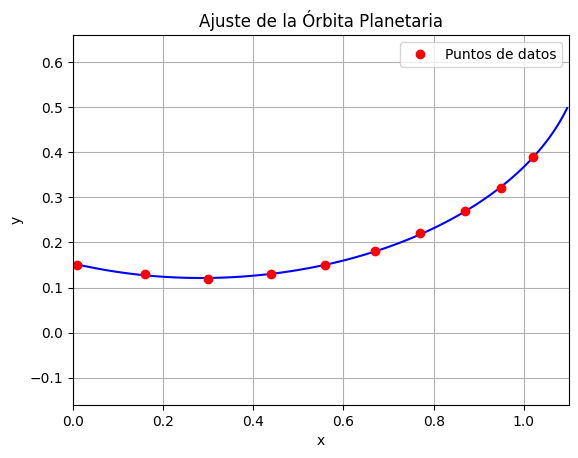

In [ ]:
# Puntos de datos
x_valores = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
y_valores = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])

# Construir la matriz X y el vector z
X = np.column_stack([
    y_valores**2,
    x_valores * y_valores,
    x_valores,
    y_valores,
    np.ones_like(x_valores)
])
z = x_valores**2

# Resolvemos el problema de minimos cuadrados ahora usando numpu para asegurarnos que no haya ningun error
parametros, residuos, rango, s = np.linalg.lstsq(X, z, rcond=None)
a, b, c, d, e = parametros

# Enseñamos los resultados obtenidos
print("Parámetros orbitales:")
print(f"a = {a:.5f}")
print(f"b = {b:.5f}")
print(f"c = {c:.5f}")
print(f"d = {d:.5f}")
print(f"e = {e:.5f}")

# Graficamos con los datos la curva que ajustamos
rejilla_x = np.linspace(0, 1.1, 400)
rejilla_y = np.linspace(0, 0.5, 400)
Xg, Yg = np.meshgrid(rejilla_x, rejilla_y)

# Evaluamos la funcion de la elipse dada
F = a * Yg**2 + b * Xg * Yg + c * Xg + d * Yg + e - Xg**2

# Graficamos la línea de nivel donde F = 0
plt.contour(Xg, Yg, F, levels=[0], colors='blue')
plt.plot(x_valores, y_valores, 'ro', label='Puntos de datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de la Órbita Planetaria')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
